# Strategic Analysis: Beauty Product Sales & Supply
## Project by Razi Haider

## Loading and Inspecting the Data

In [3]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [4]:
# Load the dataset
df = pd.read_csv('supply_chain_data.csv')

In [5]:
# Display the first few rows of the dataset
df.head()

Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29                 215   
1                37  ...    Mumbai        23                 517   
2                88  ...    Mumbai        12                 971   
3                59  ...   Kolkata        24                 937   
4                56  ...     Delhi         5                 414   

  Manufacturing lead time Manufacturing costs  Inspection results  \
0                      29           46.279879             Pending   
1                      30           33.616769             Pending   
2                      27           30.688019             Pending   
3                      18           35.624741                Fail   
4                       3           92.065161                Fail   

   Defect rates  Transportation modes   Routes       Costs  
0      0.226410                  Road  Route B  187.752075  
1      4.854068                  Road  Route B  503.065579  
2      4.580593                   Air  Route C  141.920282  
3      4.746649                  Rail  Route A  254.776159  
4      3.145580                   Air  Route A  923.440632  

[5 rows x 24 columns]

In [6]:
# Display descriptive statistics
print(df.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

In [7]:
# Get the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

## Data Cleaning

In [9]:
# Check for missing values
print(df.isnull().sum())

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


In [10]:
# Check for duplicate values 
print(df.duplicated().sum())

0


##### *The dataset is complete with no missing values and duplicated values.*

## Sales and Revenue Analysis by SKU

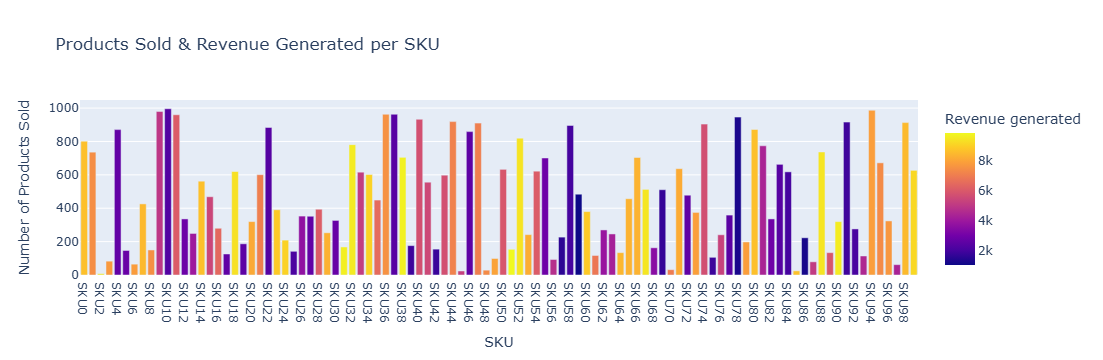

In [13]:
# Create a bar chart
fig = px.bar(df, x='SKU', y='Number of products sold',
             hover_data=['Price', 'Revenue generated'], color='Revenue generated',
             labels={'Number of products sold':'Number of products sold', 'Revenue generated':'Revenue generated'},
             title="Products Sold & Revenue Generated per SKU")
fig.update_layout(
    xaxis_title='SKU',
    yaxis_title='Number of Products Sold'
)
fig.show()

In [14]:
# Identify top 5 SKU on revenue generated
top_performing_products = df.groupby('SKU').agg({'Revenue generated': 'sum'}).reset_index().sort_values(by='Revenue generated', ascending=False).head(5)
top_performing_products


SKU  Revenue generated
47  SKU51        9866.465458
32  SKU38        9692.318040
25  SKU31        9655.135103
90  SKU90        9592.633570
12   SKU2        9577.749626

Text(0.5, 1.0, 'Top 10 SKU by Price')

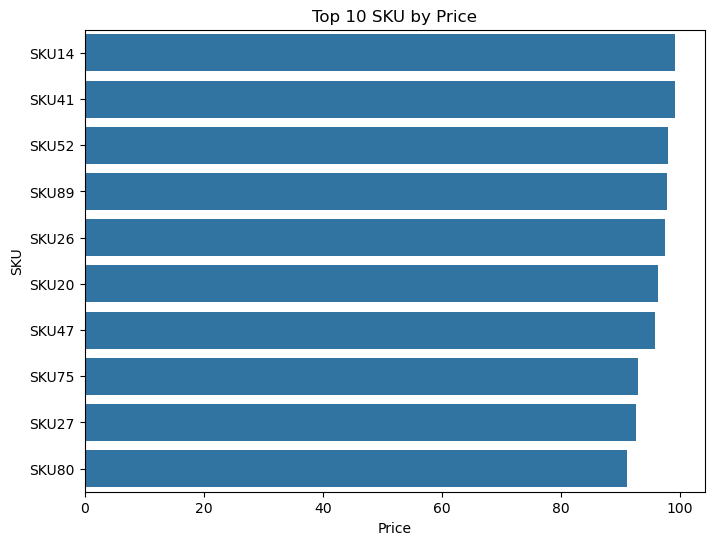

In [15]:
import matplotlib.pyplot as plt
# Plot a bar chart of the top 10 products by revenue
product_sold = df.groupby('SKU')['Price'].sum()
product_sold= product_sold.sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=product_sold[:10], y=product_sold[:10].index)
plt.xlabel('Price')
plt.ylabel('SKU')
plt.title('Top 10 SKU by Price')

##### *The top 5 SKUs by revenue are distinct from those in the top 10 by price, indicating that high revenue does not necessarily correlate with high price. This suggests that factors other than price may be driving revenue for these top SKUs.*

## Correlation Matrix

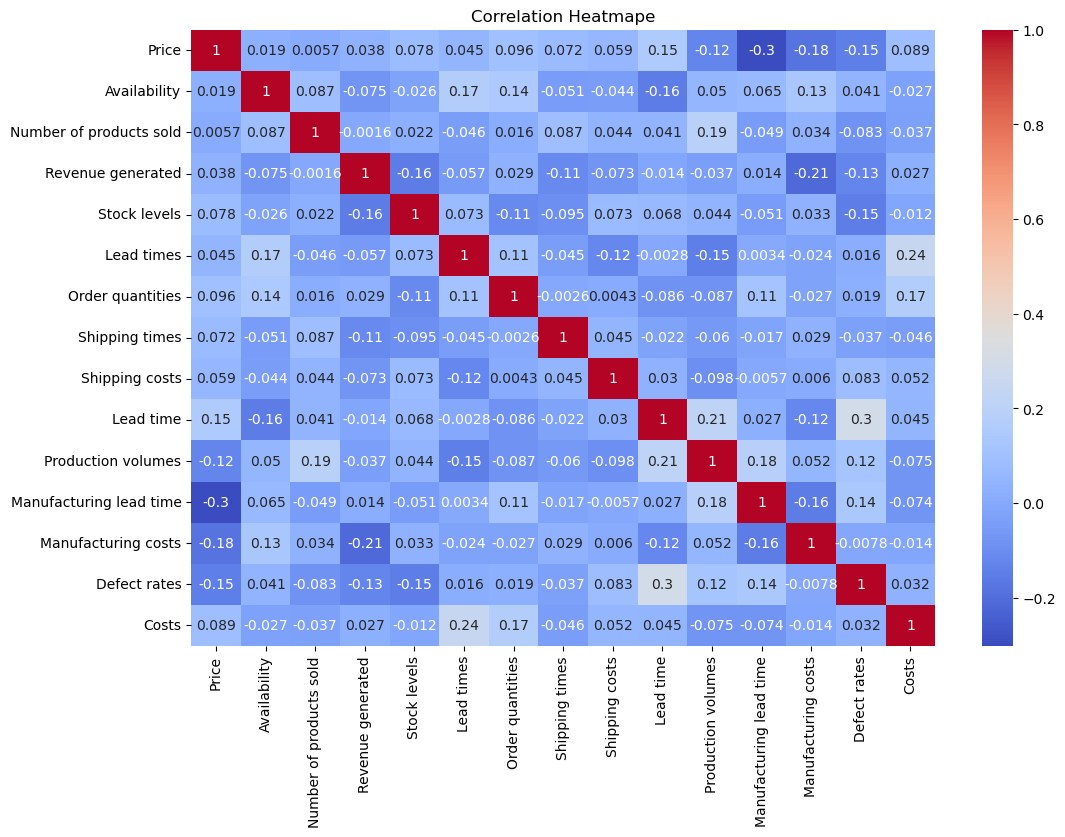

                            Price  Availability  Number of products sold  \
Price                    1.000000      0.019083                 0.005739   
Availability             0.019083      1.000000                 0.087496   
Number of products sold  0.005739      0.087496                 1.000000   
Revenue generated        0.038424     -0.075170                -0.001641   
Stock levels             0.078261     -0.025900                 0.022189   
Lead times               0.044855      0.170439                -0.046419   
Order quantities         0.095819      0.143769                 0.015992   
Shipping times           0.071942     -0.051377                 0.087315   
Shipping costs           0.058543     -0.044179                 0.044285   
Lead time                0.152185     -0.156669                 0.041230   
Production volumes      -0.124575      0.050134                 0.187945   
Manufacturing lead time -0.301313      0.065333                -0.048939   
Manufacturin

In [18]:
# Correlation heatmap
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmape")  # This would cause a conflict

plt.show()

print(corr_matrix)

##### *The correlation analysis reveals that price has a minimal impact on revenue, while stock levels negatively correlate with revenue, suggesting potential overstocking issues. Production volumes strongly correlate negatively with cost per unit, indicating economies of scale, whereas manufacturing costs are closely linked to cost per unit.*

## Trends in Distribution of Numeric Variables

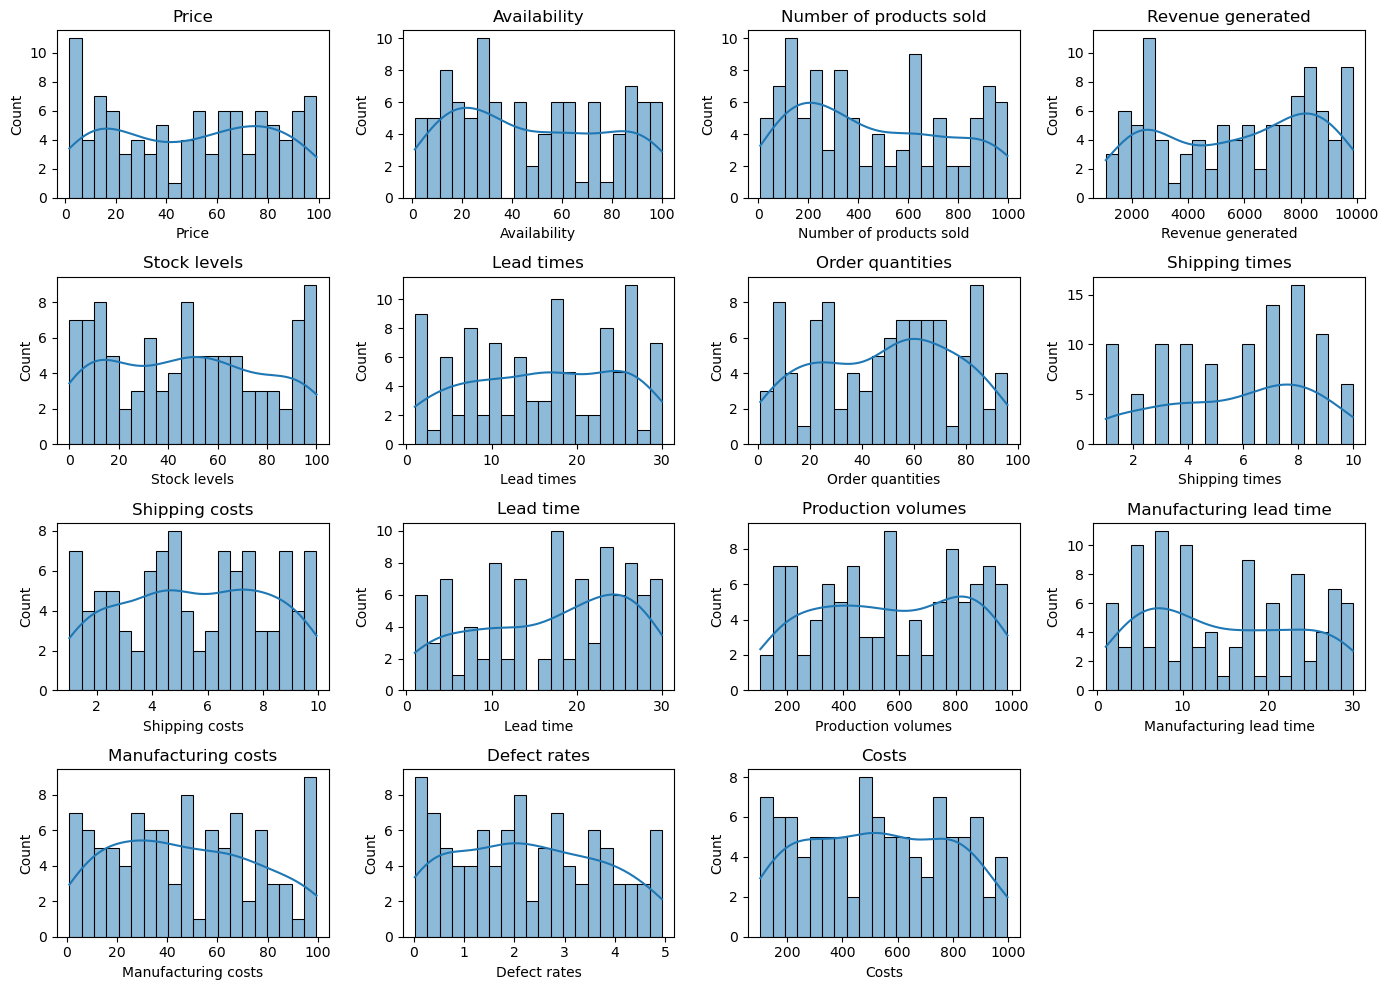

In [21]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_df):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(column)
plt.tight_layout()
plt.show()


## Product Type Performance Analysis: Price, Sales, Revenue, and Costs

  Product type      Price
0    cosmetics  57.361058
1     haircare  46.014279
2     skincare  47.259329


C:\Users\Razi\AppData\Local\Temp\ipykernel_12688\1943415283.py:9: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




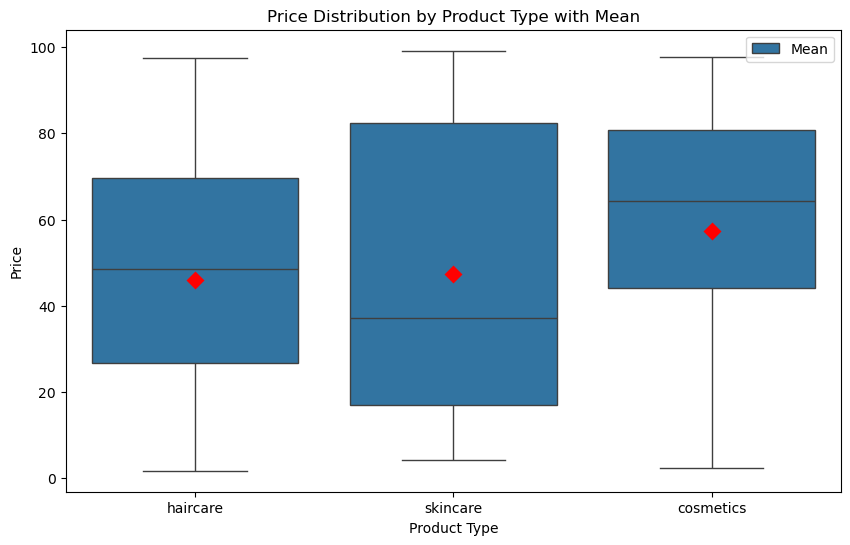

In [23]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product type', y='Price', data=df)

# Calculate the mean price for each product type
mean_prices = df.groupby('Product type')['Price'].mean().reset_index()
print(mean_prices)
# Overlay the mean price as points
sns.pointplot(x='Product type', y='Price', data=mean_prices, join=False, color='red', markers='D', estimator=np.mean)

plt.title('Price Distribution by Product Type with Mean')
plt.xlabel('Product Type')
plt.ylabel('Price')
plt.legend(['Mean'], loc='upper right')
plt.show()



  Product type  Number of products sold
0    cosmetics               452.192308
1     haircare               400.323529
2     skincare               518.275000


C:\Users\Razi\AppData\Local\Temp\ipykernel_12688\3623212743.py:9: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




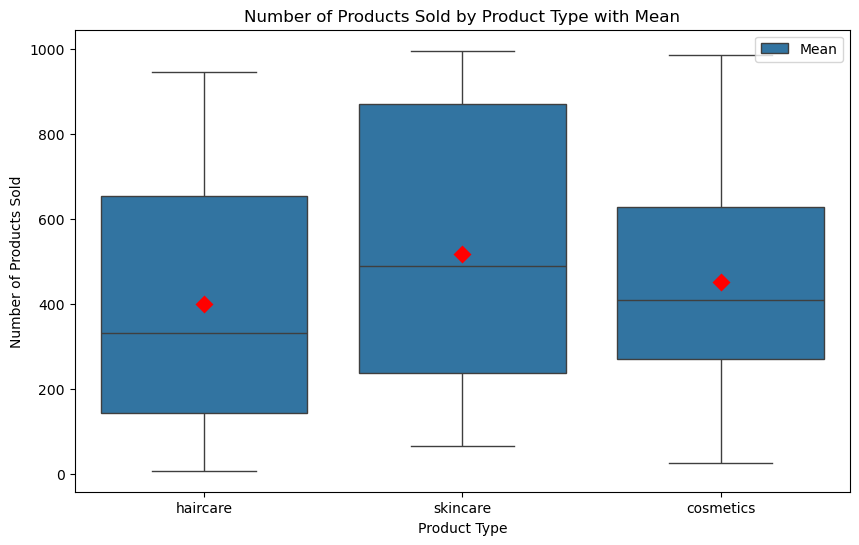

In [24]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product type', y='Number of products sold', data=df)

# Calculate the mean number of products sold for each product type
mean_sales = df.groupby('Product type')['Number of products sold'].mean().reset_index()
print(mean_sales)
# Overlay the mean number of products sold as points
sns.pointplot(x='Product type', y='Number of products sold', data=mean_sales, join=False, color='red', markers='D', estimator=np.mean)

plt.title('Number of Products Sold by Product Type with Mean')
plt.xlabel('Product Type')
plt.ylabel('Number of Products Sold')
plt.legend(['Mean'], loc='upper right')
plt.show()

  Product type  Revenue generated
0    cosmetics        6212.356385
1     haircare        5131.040900
2     skincare        6040.704053


C:\Users\Razi\AppData\Local\Temp\ipykernel_12688\4005110356.py:9: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




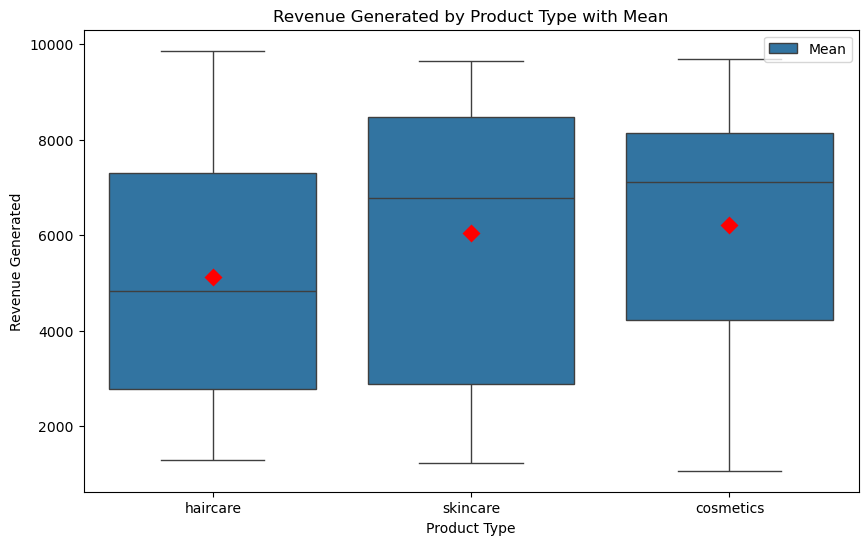

In [25]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product type', y='Revenue generated', data=df)

# Calculate the mean revenue generated for each product type
mean_revenue = df.groupby('Product type')['Revenue generated'].mean().reset_index()
print(mean_revenue)
# Overlay the mean revenue as points
sns.pointplot(x='Product type', y='Revenue generated', data=mean_revenue, join=False, color='red', markers='D', estimator=np.mean)

plt.title('Revenue Generated by Product Type with Mean')
plt.xlabel('Product Type')
plt.ylabel('Revenue Generated')
plt.legend(['Mean'], loc='upper right')
plt.show()

In [26]:
# Calculating total sales volume and total revenue by product type
product_sales_and_revenue = df.groupby('Product type').agg({
    'Number of products sold': 'sum',
    'Revenue generated': 'sum'
}).reset_index()

# Calculating average price for each product type
average_price_by_product_type = df.groupby('Product type')['Price'].mean().reset_index()

# Merging the results into a single DataFrame for a comprehensive overview
product_performance_summary = pd.merge(product_sales_and_revenue, average_price_by_product_type, on='Product type', how='left')
product_performance_summary.rename(columns={'Price': 'Average Price'}, inplace=True)

product_performance_summary

Product type  Number of products sold  Revenue generated  Average Price
0    cosmetics                    11757      161521.265999      57.361058
1     haircare                    13611      174455.390605      46.014279
2     skincare                    20731      241628.162133      47.259329

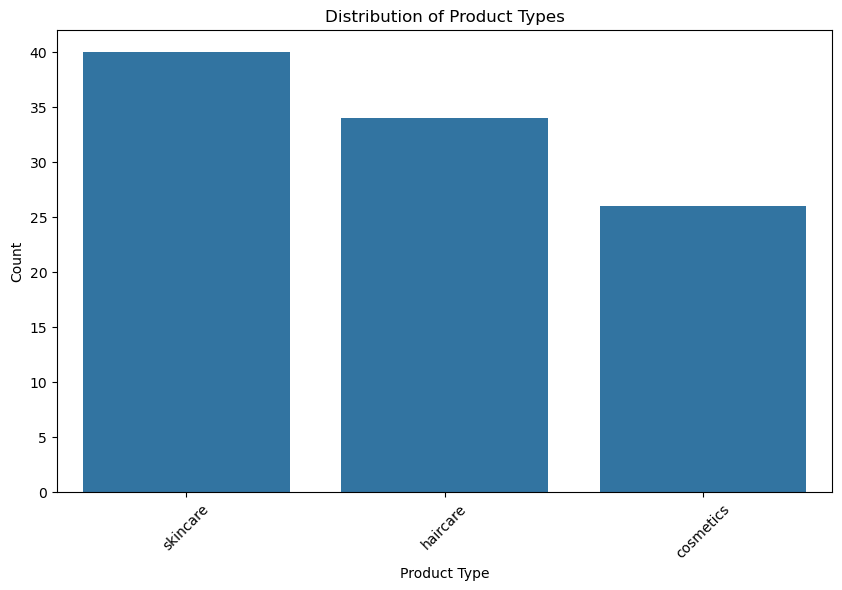

In [27]:
# Plot the distribution of product types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product type', order=df['Product type'].value_counts().index)
plt.title('Distribution of Product Types')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### *Skincare products lead in sales volume and revenue, making them the top-performing category. Cosmetics, with higher average prices, significantly contribute to revenue despite moderate sales. Haircare products show steady demand, balancing lower prices with reliable sales, demonstrating stable performance.*

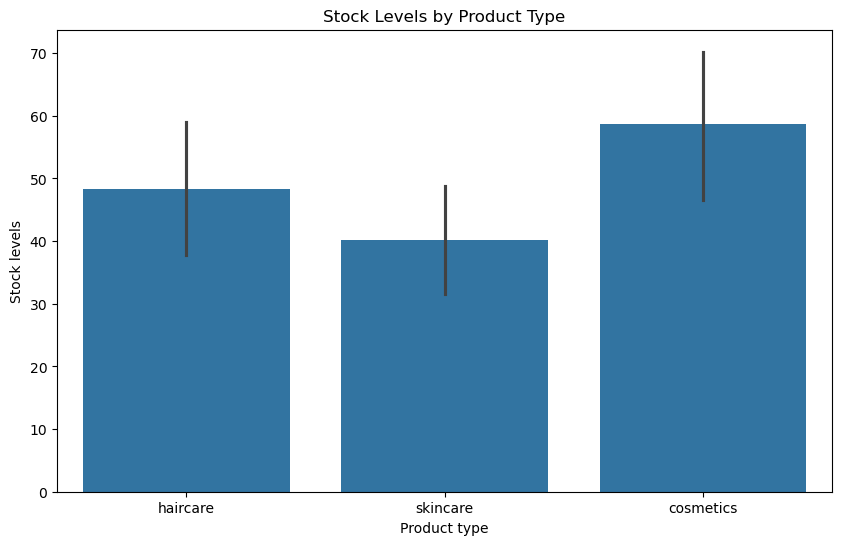

In [29]:
# Stock levels by product type
plt.figure(figsize=(10, 6))
sns.barplot(x='Product type', y='Stock levels', data=df)
plt.title('Stock Levels by Product Type')
plt.show()

In [30]:
df.groupby('Product type')['Stock levels'].sum()

Product type
cosmetics    1525
haircare     1644
skincare     1608
Name: Stock levels, dtype: int64

In [31]:
df.groupby('Product type')['Stock levels'].mean()


Product type
cosmetics    58.653846
haircare     48.352941
skincare     40.200000
Name: Stock levels, dtype: float64

##### *Haircare products possess the highest overall stock levels, cosmetics have the highest average stock levels per product type. This suggests that the variety of cosmetic products is greater, with each having a higher average stock compared to the more concentrated stock levels seen in haircare and skincare products.*

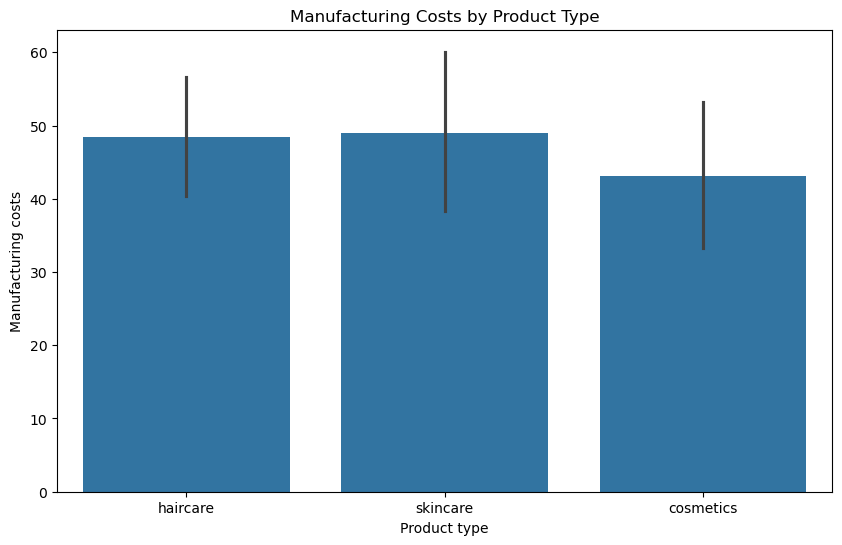

In [33]:
# Cost Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='Product type', y='Manufacturing costs', data=df)
plt.title('Manufacturing Costs by Product Type')
plt.show()


In [34]:
df.groupby('Product type')['Manufacturing costs'].sum()

Product type
cosmetics    1119.371253
haircare     1647.571776
skincare     1959.726295
Name: Manufacturing costs, dtype: float64

In [35]:
df.groupby('Product type')['Manufacturing costs'].mean()

Product type
cosmetics    43.052740
haircare     48.457993
skincare     48.993157
Name: Manufacturing costs, dtype: float64

##### *Skincare products have the highest total manufacturing costs, cosmetics have the lowest average manufacturing cost per product type. This indicates that skincare products are more costly to produce overall, while individual cosmetics are relatively less expensive to manufacture compared to haircare and skincare items.*

## Inventory Turnover Analysis

### Feature Engineering

In [39]:
# Inventory Turnover
df['Inventory Turnover'] = df['Number of products sold'] / df['Stock levels']

In [40]:
# Summarize Inventory Turnover Ratio
df['Inventory Turnover'].describe()

count    100.000000
mean            inf
std             NaN
min        0.258065
25%        4.574373
50%        8.698822
75%       20.531907
max             inf
Name: Inventory Turnover, dtype: float64

In [41]:
zero_stock_levels = df[df['Stock levels'] == 0]
print("Rows with zero stock levels:\n", zero_stock_levels)

Rows with zero stock levels:
    Product type    SKU      Price  Availability  Number of products sold  \
68     haircare  SKU68  37.931812            29                      163   

    Revenue generated Customer demographics  Stock levels  Lead times  \
68        3550.218433            Non-binary             0           8   

    Order quantities  ...  Lead time Production volumes  \
68                58  ...          2                375   

    Manufacturing lead time Manufacturing costs Inspection results  \
68                       18           97.113582               Fail   

    Defect rates  Transportation modes   Routes       Costs Inventory Turnover  
68      1.983468                  Rail  Route A  299.706303                inf  

[1 rows x 25 columns]


In [42]:
df['Inventory Turnover'] = df['Number of products sold'] / (df['Stock levels']+1)

In [43]:
# Summarize Inventory Turnover Ratio
inventory_turnover_summary = df['Inventory Turnover'].describe()
print("Inventory Turnover Summary:\n", inventory_turnover_summary)


Inventory Turnover Summary:
 count    100.000000
mean      24.474793
std       45.195561
min        0.255319
25%        4.354545
50%        8.569780
75%       19.942320
max      301.000000
Name: Inventory Turnover, dtype: float64


##### *The initial Inventory Turnover Ratio included infinite values due to division by zero from zero stock levels, which was resolved by adding 1 to the denominator. The adjusted ratio, with a mean of 24.47 and a standard deviation of 45.20, indicates high average turnover with significant variability among products.*

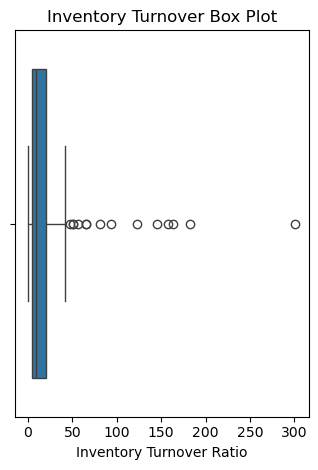

In [45]:
# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Inventory Turnover'])
plt.title('Inventory Turnover Box Plot')
plt.xlabel('Inventory Turnover Ratio')

plt.tight_layout()
plt.show()

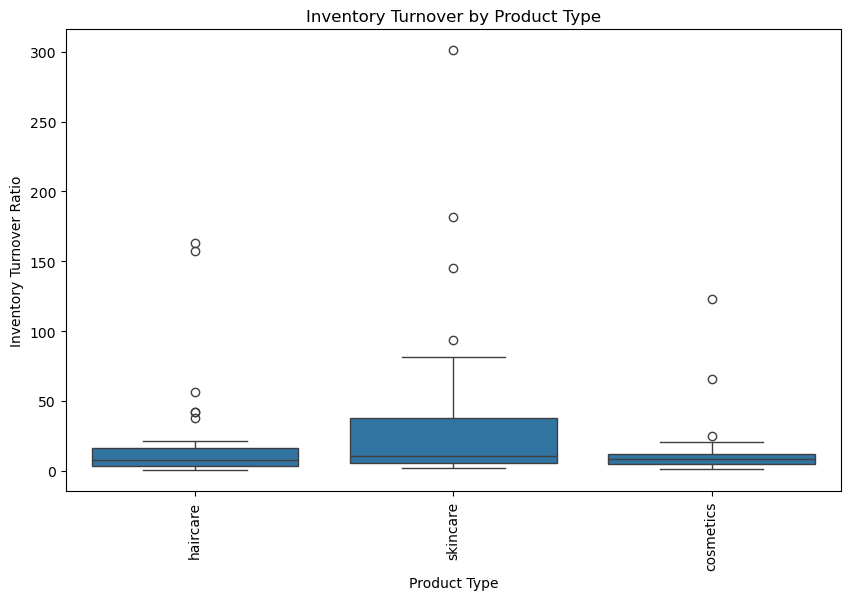

In [46]:
# Analyze Inventory Turnover by Product Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product type', y='Inventory Turnover', data=df)
plt.title('Inventory Turnover by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Inventory Turnover Ratio')
plt.xticks(rotation=90)
plt.show()

In [47]:
df.groupby('Product type')['Inventory Turnover'].sum()

Product type
cosmetics     386.542516
haircare      705.695631
skincare     1355.241202
Name: Inventory Turnover, dtype: float64

In [48]:
df.groupby('Product type')['Inventory Turnover'].mean()

Product type
cosmetics    14.867020
haircare     20.755754
skincare     33.881030
Name: Inventory Turnover, dtype: float64

##### *The observed Inventory Turnover Ratios for various product types exhibit substantial individual turnover rates, yet the average turnover values are comparatively lower. This indicates that while specific products achieve exceptionally high turnover, the overall performance of each product category is more balanced, reflecting significant variability in inventory dynamics within these categories.*

## Supply Chain Optimization

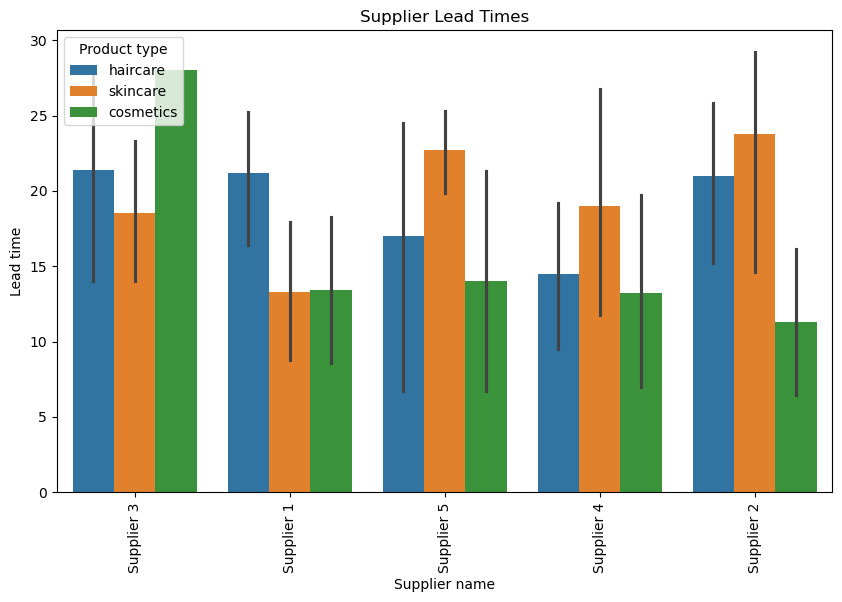

In [51]:
# Supplier Performance Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='Supplier name', y='Lead time', data=df, hue='Product type' )
plt.title('Supplier Lead Times')
plt.xticks(rotation=90)
plt.show()

In [52]:
df.groupby('Product type')['Lead time'].sum()

Product type
cosmetics    352
haircare     636
skincare     720
Name: Lead time, dtype: int64

In [53]:
df.groupby('Product type')['Lead time'].mean()

Product type
cosmetics    13.538462
haircare     18.705882
skincare     18.000000
Name: Lead time, dtype: float64

In [54]:
df.groupby(['Supplier name', 'Product type'])['Lead time'].sum()

Supplier name  Product type
Supplier 1     cosmetics        94
               haircare        106
               skincare        199
Supplier 2     cosmetics        79
               haircare        210
               skincare        119
Supplier 3     cosmetics        28
               haircare        107
               skincare        167
Supplier 4     cosmetics        53
               haircare        145
               skincare         76
Supplier 5     cosmetics        98
               haircare         68
               skincare        159
Name: Lead time, dtype: int64

In [55]:
df.groupby(['Supplier name', 'Product type'])['Lead time'].mean()

Supplier name  Product type
Supplier 1     cosmetics       13.428571
               haircare        21.200000
               skincare        13.266667
Supplier 2     cosmetics       11.285714
               haircare        21.000000
               skincare        23.800000
Supplier 3     cosmetics       28.000000
               haircare        21.400000
               skincare        18.555556
Supplier 4     cosmetics       13.250000
               haircare        14.500000
               skincare        19.000000
Supplier 5     cosmetics       14.000000
               haircare        17.000000
               skincare        22.714286
Name: Lead time, dtype: float64

##### *Lead times vary significantly by product type and supplier. Skincare products generally have the longest lead times, while cosmetics have the shortest. Supplier performance also differs. Supplier 2 is best for cosmetics, Supplier 1 excels for haircare, and Supplier 3 is the most efficient for skincare. Conversely, Supplier 3 has the longest lead time for cosmetics, Supplier 2 is the worst for haircare, and Supplier 2 also has the longest lead time for skincare. This analysis suggests selecting suppliers based on their lead time performance to optimize supply chain efficiency for each product category.*

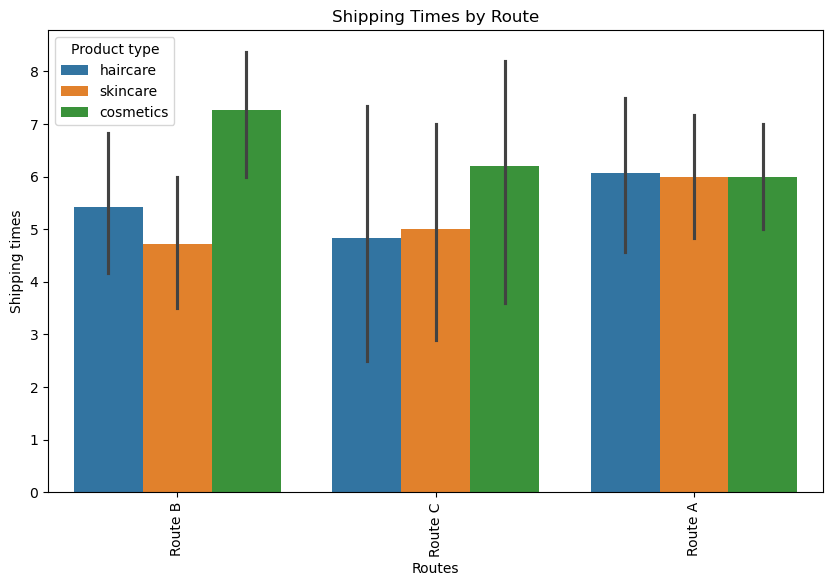

In [57]:
# Route Optimization
plt.figure(figsize=(10, 6))
sns.barplot(x='Routes', y='Shipping times', data=df, hue='Product type' )
plt.title('Shipping Times by Route')
plt.xticks(rotation=90)
plt.show()

In [58]:
df.groupby(['Routes'])['Shipping times'].sum()

Routes
Route A    259
Route B    211
Route C    105
Name: Shipping times, dtype: int64

In [59]:
df.groupby(['Routes'])['Shipping times'].mean()

Routes
Route A    6.023256
Route B    5.702703
Route C    5.250000
Name: Shipping times, dtype: float64

In [60]:
df.groupby(['Routes', 'Product type'])['Shipping times'].sum()

Routes   Product type
Route A  cosmetics        60
         haircare         97
         skincare        102
Route B  cosmetics        80
         haircare         65
         skincare         66
Route C  cosmetics        31
         haircare         29
         skincare         45
Name: Shipping times, dtype: int64

In [61]:
df.groupby(['Routes', 'Product type'])['Shipping times'].mean()

Routes   Product type
Route A  cosmetics       6.000000
         haircare        6.062500
         skincare        6.000000
Route B  cosmetics       7.272727
         haircare        5.416667
         skincare        4.714286
Route C  cosmetics       6.200000
         haircare        4.833333
         skincare        5.000000
Name: Shipping times, dtype: float64

##### *Route C is most effective for cosmetics, Route B is optimal for haircare, and Route B is best for skincare. Conversely, Route B is the least efficient for cosmetics, while Route C is the least efficient for both haircare and skincare. This analysis underscores the importance of route selection in optimizing shipping times for various product types.*

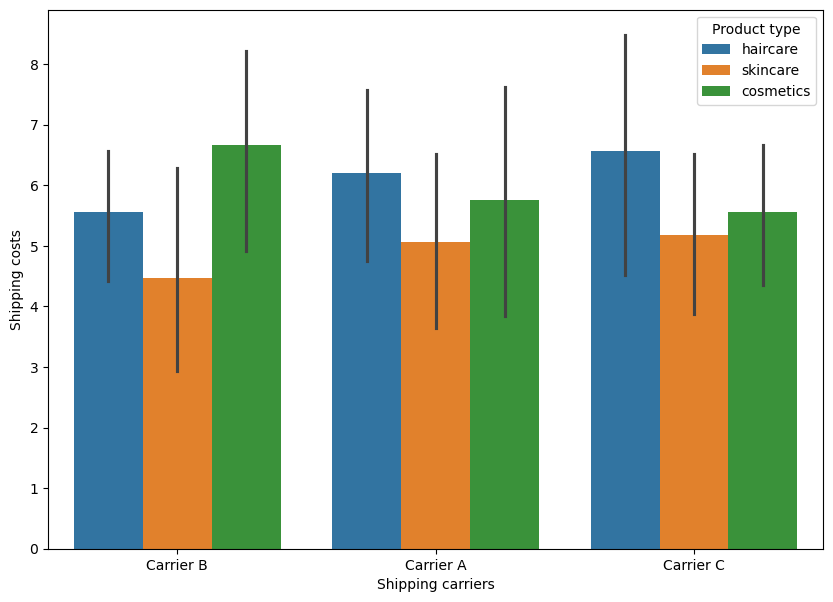

In [63]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Shipping carriers' , y = 'Shipping costs' , data =df, hue='Product type' )
plt.show()

In [64]:
df.groupby(['Shipping carriers', 'Product type'])['Shipping times'].mean()

Shipping carriers  Product type
Carrier A          cosmetics       7.800000
                   haircare        7.111111
                   skincare        4.928571
Carrier B          cosmetics       6.090909
                   haircare        5.105263
                   skincare        4.923077
Carrier C          cosmetics       6.500000
                   haircare        5.000000
                   skincare        6.153846
Name: Shipping times, dtype: float64

In [65]:
df.groupby(['Shipping carriers', 'Product type'])['Shipping costs'].mean()

Shipping carriers  Product type
Carrier A          cosmetics       5.760355
                   haircare        6.204972
                   skincare        5.063665
Carrier B          cosmetics       6.658337
                   haircare        5.556568
                   skincare        4.467779
Carrier C          cosmetics       5.552018
                   haircare        6.574033
                   skincare        5.185775
Name: Shipping costs, dtype: float64

##### *Carrier B is the most efficient in terms of average shipping times across all product types, especially for haircare and skincare, and also has the lowest average shipping costs for skincare. Carrier A offers competitive shipping times for skincare but has higher shipping costs for haircare. Carrier C has the highest average shipping times for skincare and the second-highest shipping costs overall. Therefore, Carrier B presents the best balance of efficiency and cost-effectiveness, particularly for haircare and skincare products, while Carrier A is slightly better for cosmetics in terms of shipping costs.*

## Revenue Distribution by Customer Demographics

In [68]:
# Customer Demographics Analysis: Sales distribution across customer demographics
sales_distribution_demographics = df.groupby('Customer demographics').agg({
    'Revenue generated': 'sum',
    'Number of products sold': 'sum'
}).reset_index().sort_values(by='Revenue generated', ascending=False)

# Display the results
print("\nSales Distribution Across Customer Demographics:\n", sales_distribution_demographics)


Sales Distribution Across Customer Demographics:
   Customer demographics  Revenue generated  Number of products sold
3               Unknown      173090.133837                    15211
0                Female      161514.489122                    12801
1                  Male      126634.394260                     7507
2            Non-binary      116365.801520                    10580


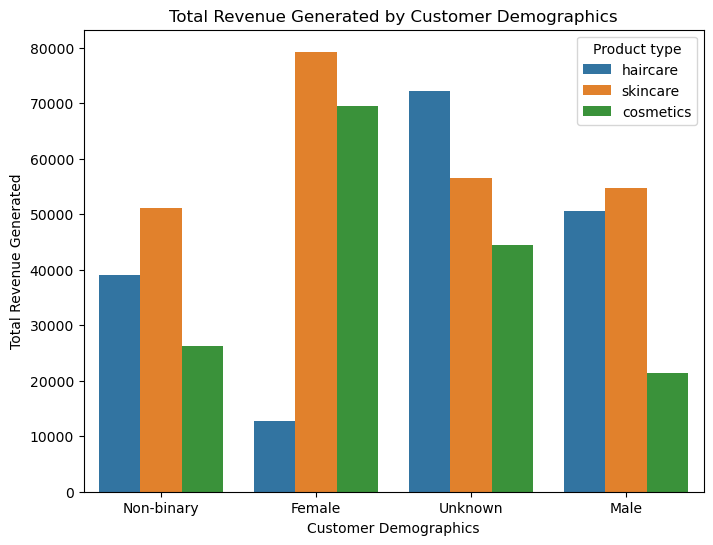

In [69]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer demographics', y='Revenue generated', data=df, estimator=sum, errorbar=None, hue='Product type')

# Add titles and labels
plt.title('Total Revenue Generated by Customer Demographics')
plt.xlabel('Customer Demographics')
plt.ylabel('Total Revenue Generated')

# Show the plot
plt.show()

In [70]:
df.groupby(['Customer demographics', 'Product type'])['Revenue generated'].sum()

Customer demographics  Product type
Female                 cosmetics       69548.542197
                       haircare        12724.833283
                       skincare        79241.113642
Male                   cosmetics       21390.965497
                       haircare        50599.927309
                       skincare        54643.501453
Non-binary             cosmetics       26235.481661
                       haircare        38971.147085
                       skincare        51159.172774
Unknown                cosmetics       44346.276645
                       haircare        72159.482928
                       skincare        56584.374264
Name: Revenue generated, dtype: float64

##### *The Unknown demographic leads significantly in both revenue and products sold, with notable contributions from haircare and skincare. Female customers follow, driven primarily by skincare. Male customers show strong revenue from haircare, while Non-binary customers contribute most through skincare. These patterns highlight diverse purchasing behaviors and emphasize the need for targeted marketing strategies based on demographic preference*

In [72]:
#Checking location wise counts
location_counts = df.groupby(['Location']).size().reset_index(name='Counts')
location_counts

Location  Counts
0  Bangalore      18
1    Chennai      20
2      Delhi      15
3    Kolkata      25
4     Mumbai      22

In [73]:
grouped_Location = df.groupby(['Location', 'Product type']).size().reset_index(name='Counts')
grouped_Location

Location Product type  Counts
0   Bangalore    cosmetics       3
1   Bangalore     haircare       9
2   Bangalore     skincare       6
3     Chennai    cosmetics       5
4     Chennai     haircare       6
5     Chennai     skincare       9
6       Delhi    cosmetics       6
7       Delhi     haircare       4
8       Delhi     skincare       5
9     Kolkata    cosmetics       4
10    Kolkata     haircare       8
11    Kolkata     skincare      13
12     Mumbai    cosmetics       8
13     Mumbai     haircare       7
14     Mumbai     skincare       7

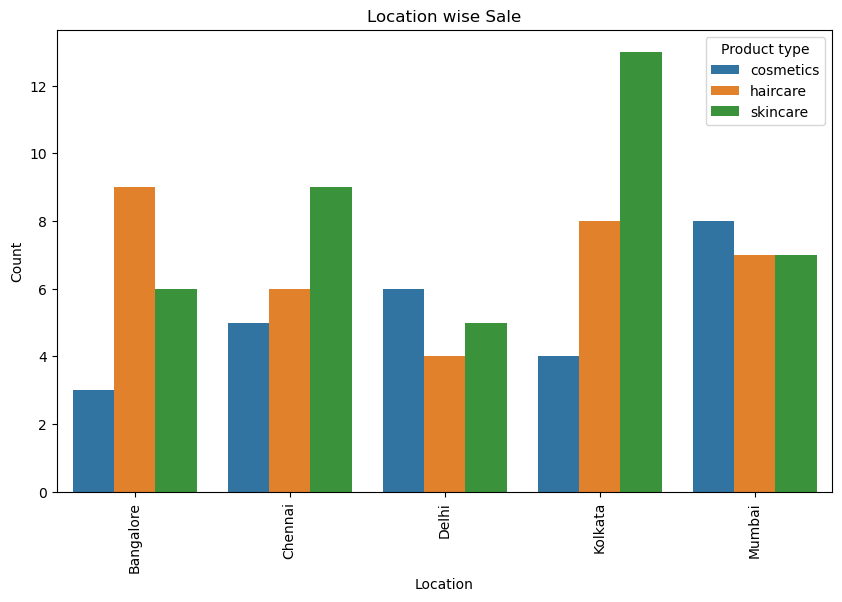

In [74]:
import matplotlib.pyplot as plt
# Create a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Location', y='Counts', hue = 'Product type', data = grouped_Location)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed
plt.title("Location wise Sale")
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [75]:
total_revenue = df.groupby('Location')['Revenue generated'].sum()
total_revenue

Location
Bangalore    102601.723882
Chennai      119142.815748
Delhi         81027.701225
Kolkata      137077.551005
Mumbai       137755.026877
Name: Revenue generated, dtype: float64

In [76]:
df.groupby(['Location', 'Product type'])['Revenue generated'].sum()

Location   Product type
Bangalore  cosmetics       19309.562880
           haircare        51654.345696
           skincare        31637.815307
Chennai    cosmetics       31461.947457
           haircare        28723.448932
           skincare        58957.419359
Delhi      cosmetics       37429.677331
           haircare        14625.900767
           skincare        28972.123128
Kolkata    cosmetics       24163.571855
           haircare        35027.713247
           skincare        77886.265903
Mumbai     cosmetics       49156.506477
           haircare        44423.981964
           skincare        44174.538437
Name: Revenue generated, dtype: float64

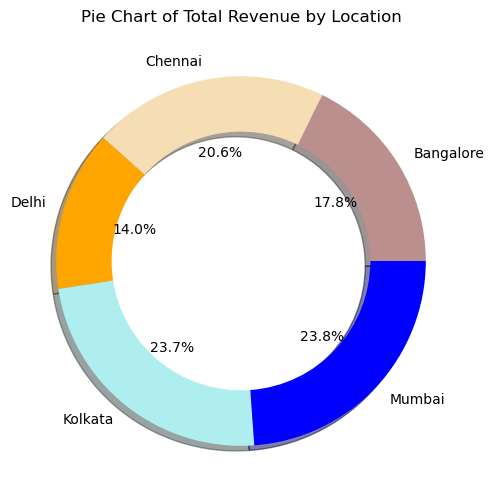

In [77]:
colors = ("rosybrown","wheat","orange", "paleturquoise", "blue" )
plt.figure(figsize=(10, 6))
plt.pie(total_revenue, labels = total_revenue.index, autopct='%1.1f%%', colors = colors, shadow = True,wedgeprops=dict(width=0.3))

plt.title('Pie Chart of Total Revenue by Location')

plt.show()

##### *Kolkata and Mumbai are the top locations for overall revenue, with both cities excelling in skincare products. Mumbai leads in cosmetics revenue, while Kolkata has a strong showing in haircare. Chennai performs well, especially in skincare, but overall revenue trails behind Kolkata and Mumbai. Bangalore shows strong revenue from haircare, though it falls short in total revenue compared to other cities. Delhi has the lowest total revenue but excels in cosmetics. These insights highlight that targeting skincare in Kolkata and Mumbai, and focusing on cosmetics in Delhi, can be strategic for maximizing revenue across different locations.*

## Transportation Modes & Defect Rates Analysis

In [80]:
Transport_modes = df['Transportation modes'].value_counts()
Transport_modes

Transportation modes
Road    29
Rail    28
Air     26
Sea     17
Name: count, dtype: int64

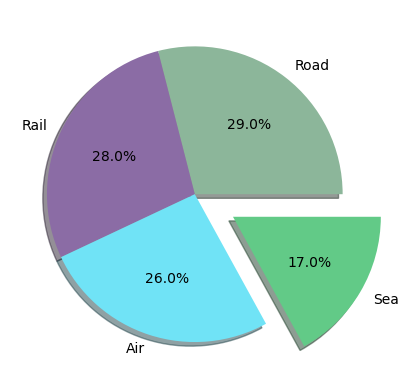

In [81]:
np.random.seed(0)  
colors = np.random.rand(len(Transport_modes), 3)  # Generating random RGB colors

explode = [0.3 if i == 'Sea' else 0 for i in Transport_modes.index]
plt.pie(x = Transport_modes, labels = Transport_modes.index, shadow=True, colors = colors, autopct='%1.1f%%', explode = explode)
plt.show()

In [82]:
grouped_df1 = df.groupby(['Transportation modes', 'Defect rates']).sum().reset_index()[['Transportation modes', 'Defect rates']]

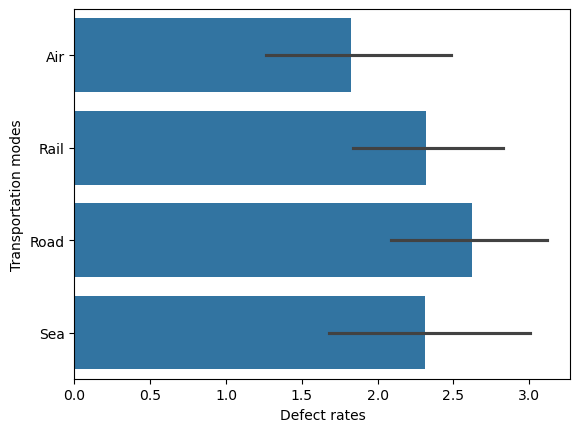

In [83]:
# Road Transport has more defects compare to AIR / RAIL

sns.barplot(x = 'Defect rates', y = 'Transportation modes', data =grouped_df1, estimator = "mean")
plt.title = ("Defect Rates by Transport modes")
plt.show()

In [84]:
df.groupby('Transportation modes')['Defect rates'].sum()

Transportation modes
Air     47.422012
Rail    64.926789
Road    76.007216
Sea     39.359782
Name: Defect rates, dtype: float64

In [85]:
df.groupby(['Transportation modes', 'Product type'])['Defect rates'].sum()


Transportation modes  Product type
Air                   cosmetics        1.996906
                      haircare        23.397670
                      skincare        22.027436
Rail                  cosmetics       19.429569
                      haircare        19.593180
                      skincare        25.904041
Road                  cosmetics       16.222049
                      haircare        26.864779
                      skincare        32.920388
Sea                   cosmetics       12.252936
                      haircare        14.571478
                      skincare        12.535368
Name: Defect rates, dtype: float64

##### *Defect rates vary by transportation mode and product type. Road transport has the highest average defect rate, while Air has the lowest. Haircare and skincare consistently show higher defect rates compared to cosmetics, indicating both transportation mode and product type influence quality.*

## Predictive Analysis

In [88]:
from scipy.stats import chi2_contingency

In [89]:
# Is there any relationship between Number of products sold with Revenue generated?

relation_1 = pd.pivot_table(
    data=df,
    index = 'Number of products sold',
    columns='Revenue generated',
    values='SKU',
    aggfunc='count'
)

# Calculating

stat, p, dof, expected = chi2_contingency(relation_1)

alpha = 0.05

if p<= alpha:
  print("Reject H0: Number of products sold has relation with revenue generated")
else:
  print("H0 is Accepted: Number of products sold has no relation with revenue generated")


H0 is Accepted: Number of products sold has no relation with revenue generated


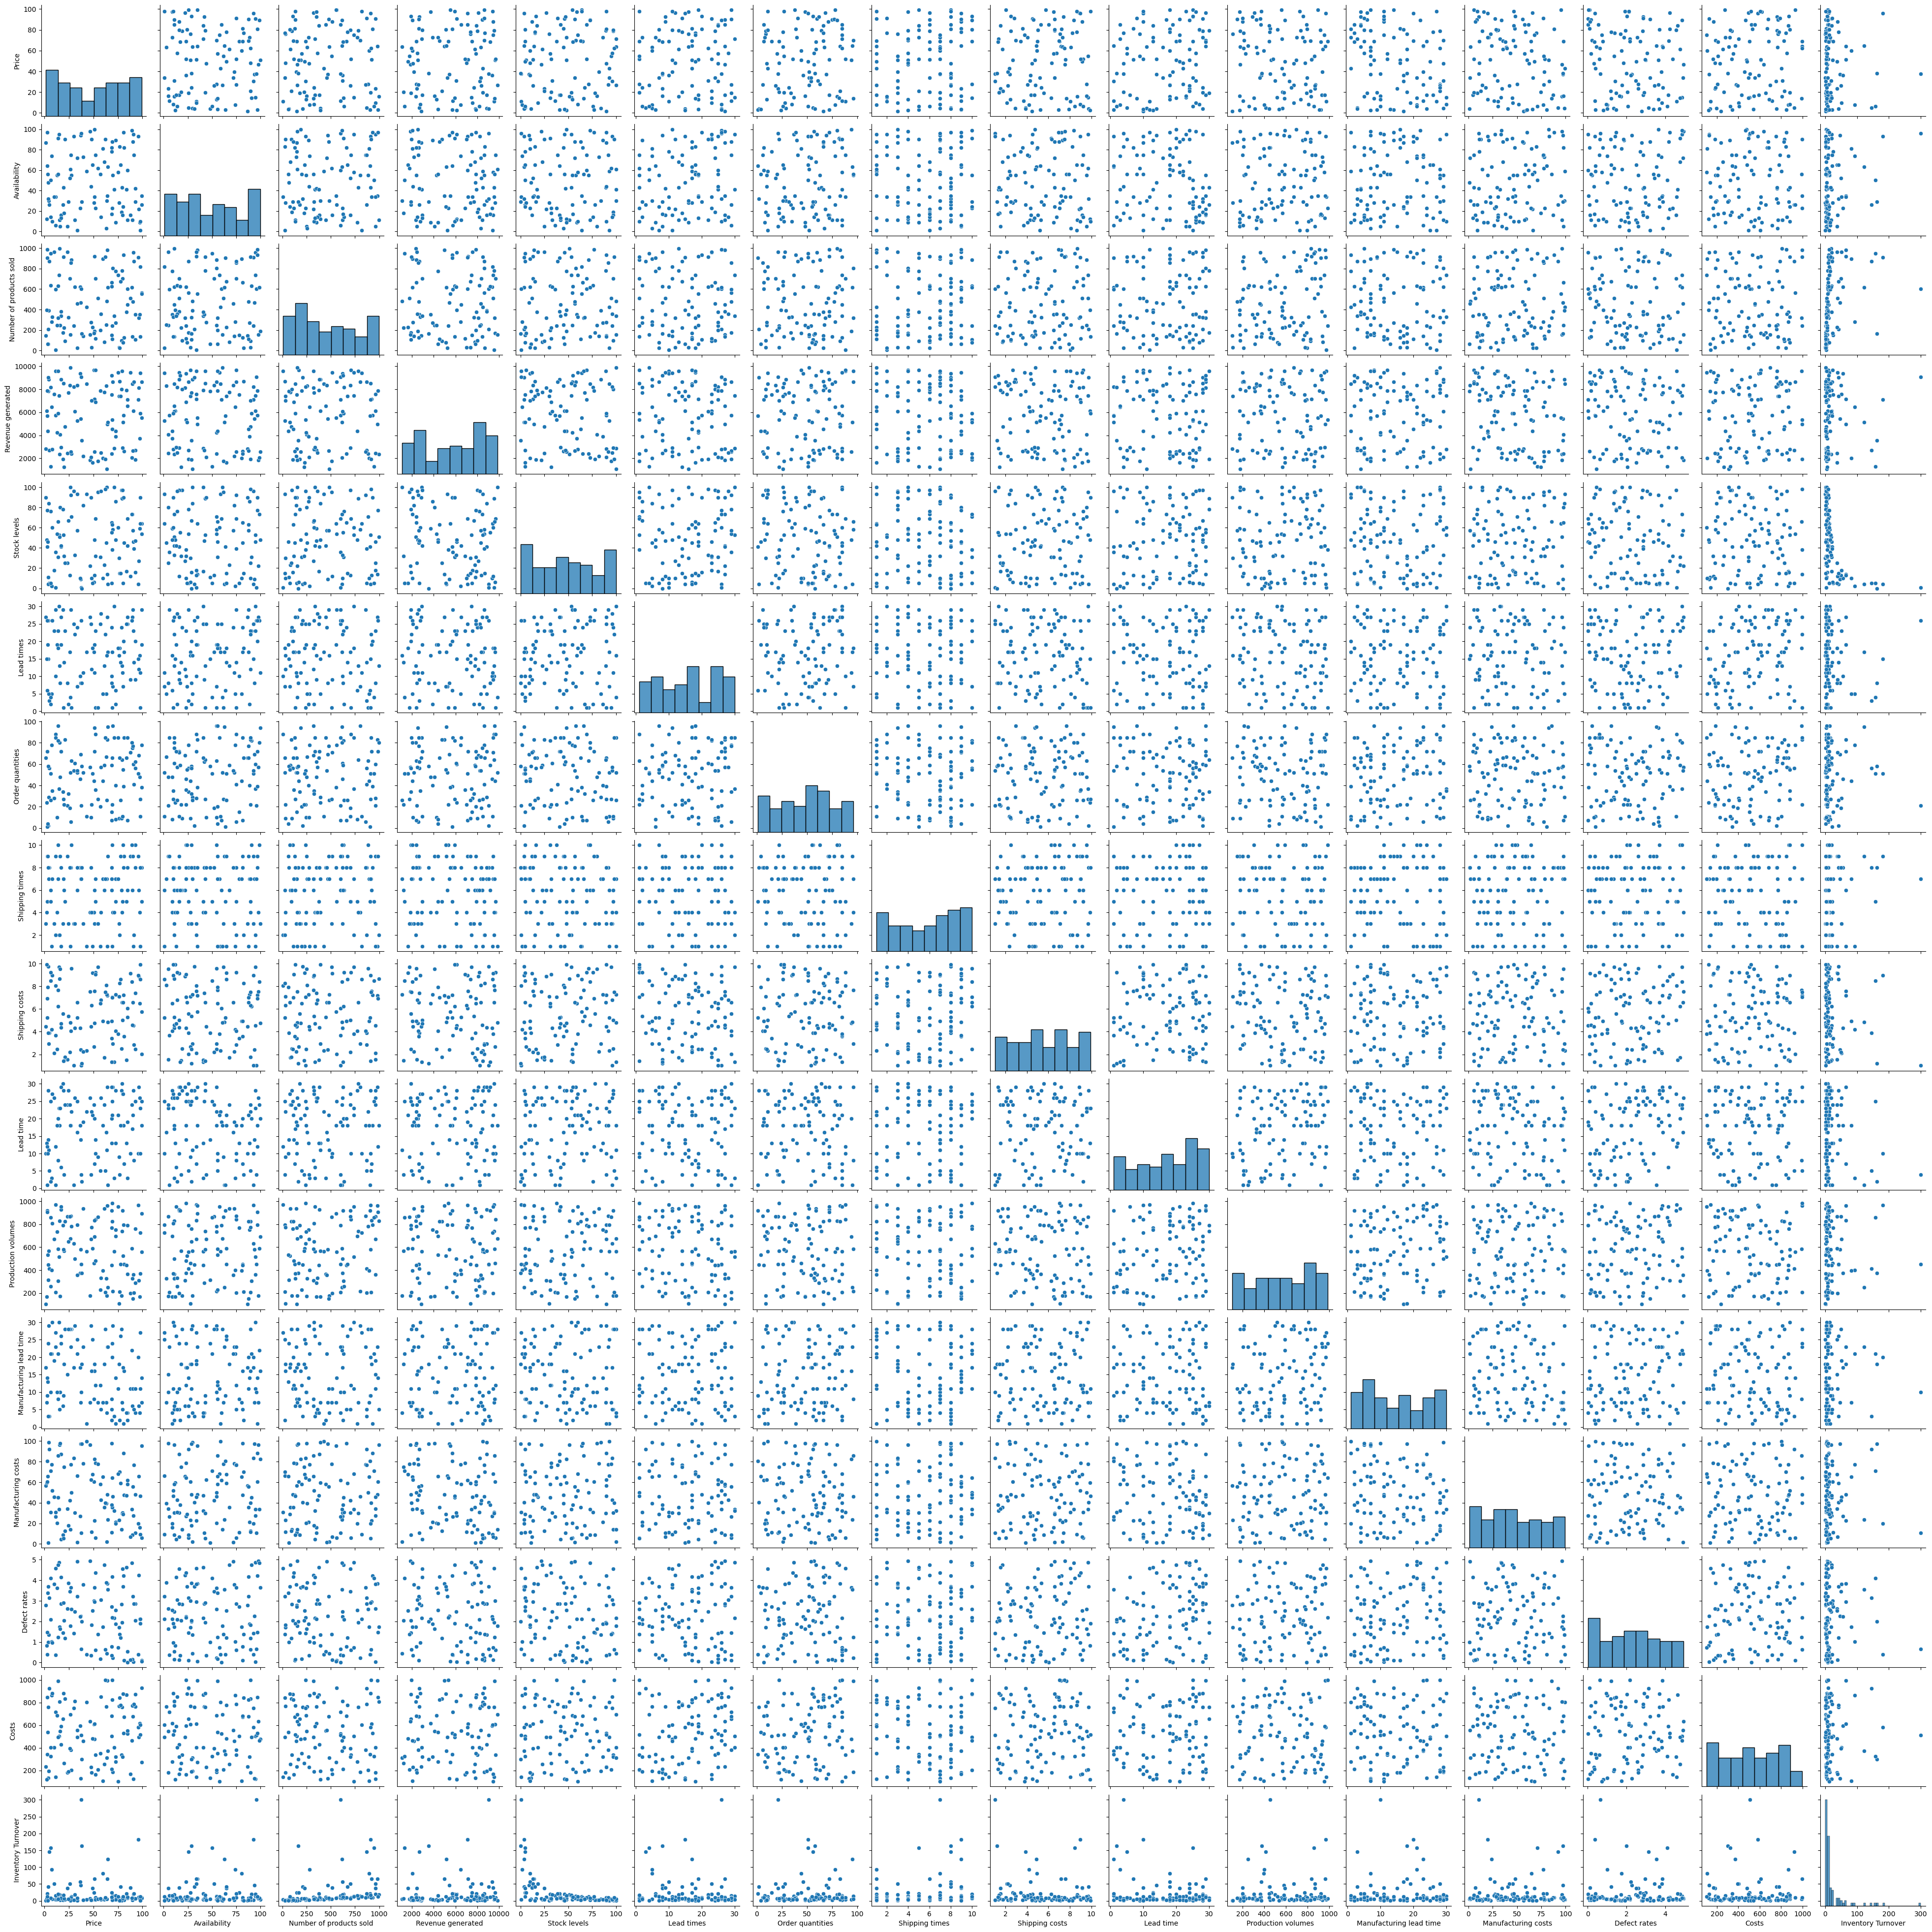

In [90]:
sns.pairplot(df)

<Axes: xlabel='Order quantities', ylabel='Production volumes'>

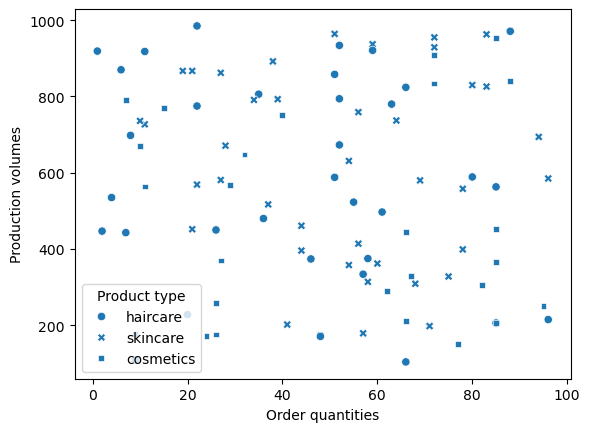

In [91]:
sns.scatterplot(data=df, x='Order quantities',y='Production volumes',style='Product type')

<Axes: xlabel='Stock levels', ylabel='Production volumes'>

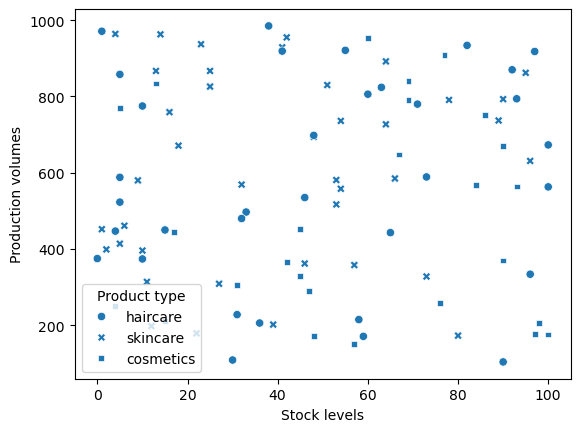

In [92]:
sns.scatterplot(data=df, x='Stock levels',y='Production volumes',style='Product type')

##### *From above, we can conclude that we cant do any predictive analysis because there is not any pattern or relation in the this data.*

## Recommendations

### 1. Revenue and Pricing Strategy
- **Focus on Non-Price Factors**: Since high revenue does not necessarily correlate with high price, evaluate factors beyond pricing that contribute to revenue. For example, analyze the top 5 revenue-generating SKUs despite their lower price and explore marketing approaches that could be applied to other products.
- **Stock Management**: Address potential overstocking issues indicated by the negative correlation between stock levels and revenue. Implement inventory management practices to optimize stock levels and reduce excess inventory, especially for products with high stock but lower revenue.

### 2. Product Category Insights
- **Leverage Skincare Success**: Skincare products lead in sales volume and revenue. Continue investing in this category and explore strategies to further enhance its performance, such as expanding the range or increasing marketing efforts for skincare products.
- **Optimize Cosmetics and Haircare**: Cosmetics contribute significantly to revenue despite moderate sales, and haircare shows steady demand. Adjust pricing, promotions, or product placement for these categories to balance revenue and sales volume.

### 3. Stock and Manufacturing Costs
- **Reduce Manufacturing Costs**: Skincare products incur the highest total manufacturing costs. Investigate ways to reduce production expenses for skincare items without compromising quality. Consider strategies used for cosmetics, which have lower average manufacturing costs, as a benchmark for cost-efficiency.
- **Cost Per Unit Analysis**: Production volumes are negatively correlated with cost per unit, indicating economies of scale. Look into increasing production volumes for products where feasible to take advantage of lower per-unit costs.

### 4. Inventory Turnover and Lead Times
- **Improve Turnover Rates**: The high variability in inventory turnover ratios suggests the need for better inventory management practices. Analyze the turnover rates of different products to identify patterns and optimize inventory levels.
- **Optimize Lead Times**: Tailor supplier selection based on lead time performance:
  - **Supplier 2**: Best for cosmetics but has the longest lead time for skincare.
  - **Supplier 1**: Excels for haircare.
  - **Supplier 3**: Most efficient for skincare but has the longest lead time for cosmetics.
  
  Adjust sourcing strategies accordingly to ensure timely availability of products.

### 5. Transportation and Carrier Efficiency
- **Select Optimal Routes**: Use the most effective routes for each product type to minimize shipping times and costs:
  - **Route C**: Best for cosmetics.
  - **Route B**: Optimal for haircare and skincare.
  
  Avoid using Route B for cosmetics and Route C for haircare and skincare as they are less efficient.
- **Carrier Choice**: Carrier B is the most efficient across all product types, especially for haircare and skincare, with the lowest average shipping costs for skincare. Use Carrier A for cosmetics if shipping costs are a concern. Avoid Carrier C due to its higher shipping times and costs.

### 6. Demographic Targeting
- **Tailor Marketing Efforts**: Use demographic insights to guide marketing strategies:
  - **Unknown Demographic**: High revenue and product sales, especially in haircare and skincare.
  - **Female Customers**: Primarily driven by skincare.
  - **Male Customers**: Significant revenue from haircare.
  - **Non-binary Customers**: Highest contribution through skincare.
  
  Target specific demographics based on their purchasing behavior to maximize sales.

### 7. Transportation Quality
- **Address Defect Rates**: Implement measures to reduce defect rates in transportation:
  - **Road Transport**: Highest defect rates.
  - **Air Transport**: Lowest defect rates.
  
  Improve quality control or use alternative transport modes, focusing on handling and transport conditions for haircare and skincare products.

### 8. Predictive Analysis
- **Focus on Existing Patterns**: Given the lack of identifiable patterns for predictive analysis, prioritize refining existing strategies based on current insights. Use the analysis of revenue, stock levels, manufacturing costs, and transportation efficiency to optimize operations.

